In [1]:
pip install -U kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/65.9 MB 1.8 MB/s eta 0:00:37
   ---------------------------------------- 0.3/65.9 MB 2.5 MB/s eta 0:00:27
   ---------------------------------------- 0.5/65.9 MB 3.0 MB/s eta 0:00:22
   ---------------------------------------- 0.7/65.9 MB 3.5 MB/s eta 0:00:19
   ---------------------------------------- 0.8/65.9 MB 3.4 MB/s eta 0:00:20
    --------------------------------------- 1.0/65.9 MB 3.3 MB/s eta 0:00:20
    --------------------------------------- 1.1/65.9 MB 3.2 MB/s eta 0:00:20
    --------------------------------------- 1.2/65.9 MB 3.0 MB/s eta 0:00:22
    --------------------------------------- 1.2/65.9 MB 3.0 MB/s eta 0:00:22
    --------------------------------------- 1.3/65.9 MB 2.8 MB/s eta 0:00:23
    --------------------------------------- 1.4/65.9 MB 2.6 MB/s eta 0:00:25
    ---------

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import kaleido

In [3]:
data = pd.read_csv("behavioural_dataset.csv")

In [4]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [8]:
print(data.columns.tolist())

['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Personal loan', 'Total Salary', 'Price']


In [9]:
print(data.shape)

(99, 8)


In [10]:
print(pd.isnull(data).sum())

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64


In [11]:
data.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
data.rename(columns={'Price':'EV_Price'},inplace=True)
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


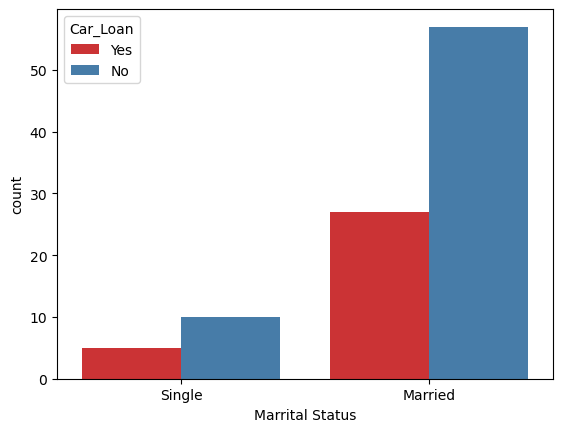

In [12]:
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = data, palette = 'Set1')
plt.show()

In [13]:
(data['Marrital Status'].value_counts()['Married'])/((data['Marrital Status'].value_counts()['Married'])+(data['Marrital Status'].value_counts()['Single']))*100
     

84.84848484848484

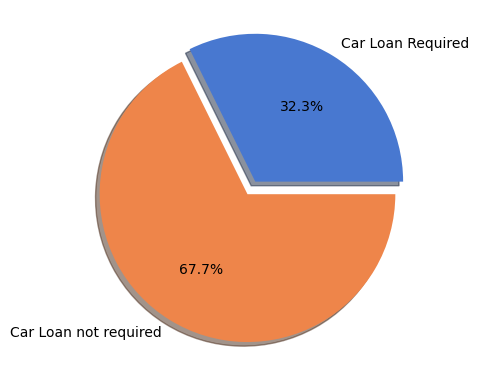

In [17]:
#Getting labels and data
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [data.query('Car_Loan == "Yes"').Car_Loan.count(),data.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('muted')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

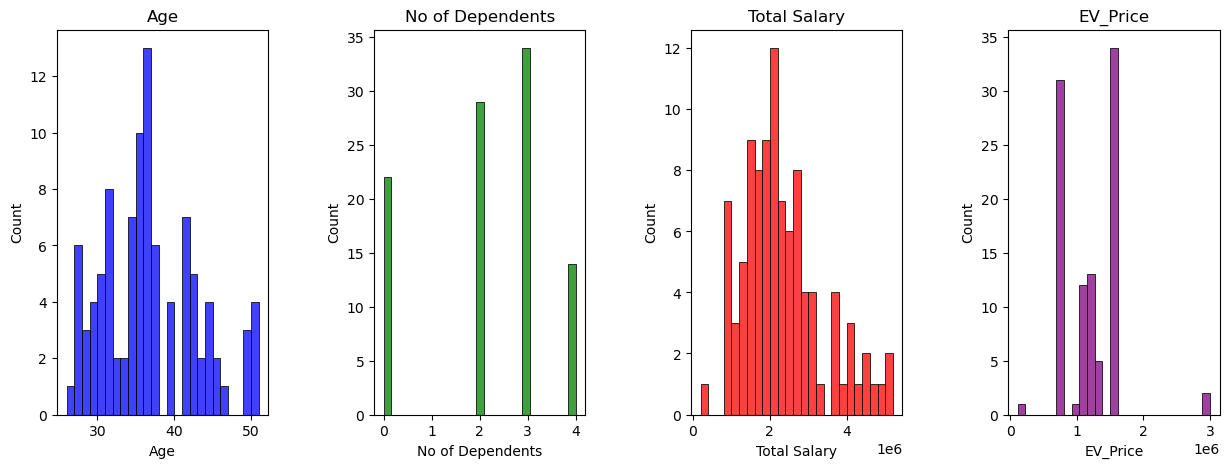

In [19]:
plt.figure(1, figsize=(15, 5))
n = 0
colors = ['blue', 'green', 'red', 'purple']  # Define colors for each feature

for i, x in enumerate(['Age', 'No of Dependents', 'Total Salary', 'EV_Price']):
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(data[x], bins=25, color=colors[i])  # Assigning color
    plt.title(f'{x}')
plt.show()

C:\Users\SHREYA SHAMBHAVI\AppData\Local\Temp\ipykernel_17052\1647364048.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = data.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)


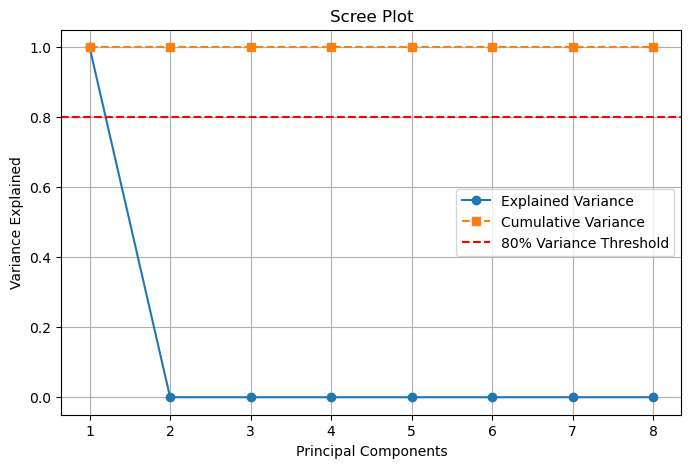

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

MD_x = data.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x_scaled)

# Explained variance and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# ---- Scree Plot ----
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', label="Explained Variance")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 's--', label="Cumulative Variance")
plt.axhline(y=0.8, color='r', linestyle='dashed', label="80% Variance Threshold")
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.legend()
plt.grid()
plt.show()

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

C:\Users\SHREYA SHAMBHAVI\AppData\Local\Temp\ipykernel_17052\3676086975.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = data.iloc[:, 1:11].applymap(lambda x: 1 if x == "Yes" else 0)
C:\Users\SHREYA SHAMBHAVI\desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHREYA SHAMBHAVI\desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHREYA SHAMBHAVI\desktop\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to d

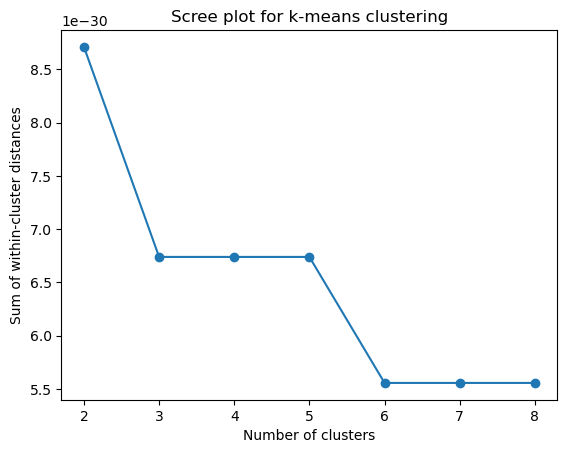

C:\Users\SHREYA SHAMBHAVI\desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.77555756e-16 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00]]
Cluster Assignments:
 0     1
1     1
2     1
3     0
4     1
5     1
6     0
7     0
8     0
9     1
10    0
11    1
12    0
13    1
14    1
15    0
16    0
17    1
18    0
19    0
Name: Cluster, dtype: int32


C:\Users\SHREYA SHAMBHAVI\desktop\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [25]:
X = data.iloc[:, 1:11].applymap(lambda x: 1 if x == "Yes" else 0)

# Running k-means for different k values
k_values = range(2, 9)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot scree plot (elbow method)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of within-cluster distances")
plt.title("Scree plot for k-means clustering")
plt.show()

# Running k-means with optimal k (assume k=3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=1234)

data["Cluster"] = kmeans.fit_predict(X)

# Display cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Display first few cluster assignments
print("Cluster Assignments:\n", data["Cluster"].head(20))

C:\Users\SHREYA SHAMBHAVI\AppData\Local\Temp\ipykernel_17052\133545036.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     27.0
1     35.0
2     45.0
3     41.0
4     31.0
      ... 
94    27.0
95    50.0
96    51.0
97    51.0
98    51.0
Name: Age, Length: 99, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cluster_data.iloc[:, col] = cluster_data.iloc[:, col].astype(float)
C:\Users\SHREYA SHAMBHAVI\AppData\Local\Temp\ipykernel_17052\133545036.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0.0
1     2.0
2     4.0
3     3.0
4     2.0
     ... 
94    0.0
95    3.0
96    2.0
97    2.0
98    2.0
Name: No of Dependents, Length: 99, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cluster_data.iloc[:, col] = cluster_data

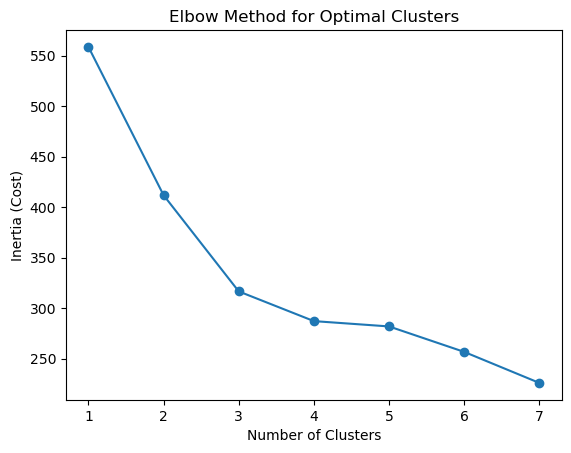

Initialization complete
Iteration 0, inertia 707.513245025012.
Iteration 1, inertia 461.08738927309867.
Iteration 2, inertia 429.2036671422491.
Iteration 3, inertia 412.8362589337397.
Iteration 4, inertia 411.7539727804479.
Converged at iteration 4: strict convergence.
[0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1]


C:\Users\SHREYA SHAMBHAVI\desktop\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Convert all data into numerical format
cluster_features = list(data.columns)
cluster_data = data[cluster_features]

# Identify categorical and numerical columns
categorical_columns = [1, 2, 3, 5]  # Indices of categorical features
numerical_columns = [0, 4, 6, 7]  # Indices of numerical features

# Convert numerical columns to float
for col in numerical_columns:
    cluster_data.iloc[:, col] = cluster_data.iloc[:, col].astype(float)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(cluster_data.iloc[:, categorical_columns])

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(cluster_data.iloc[:, numerical_columns])

# Combine processed categorical and numerical data
final_data = np.hstack((scaled_numerical, encoded_categorical))

# Finding optimal clusters using Elbow Method (similar to KPrototypes' cost approach)
cost = []
for num_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(final_data)
    cost.append(kmeans.inertia_)  # Inertia is similar to KPrototypes' cost

# Plot Elbow Method graph
plt.plot(range(1, 8), cost, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Cost)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Applying KMeans with 2 clusters (like in your KPrototypes code)
kmeans = KMeans(n_clusters=2, verbose=2, max_iter=20, random_state=42)
clusters = kmeans.fit_predict(final_data)

print(clusters)


In [31]:
# Appending the cluster data

data['Cluster'] = clusters

In [32]:
# Average cost of the EV
data.EV_Price.mean()


1194040.4040404041

In [33]:
# Average cost of a car in segment 1 
data.EV_Price[data.Cluster==0].mean()

1056400.0

In [34]:

data['EV_Price'][data.Cluster==1].max()

3000000

In [35]:

# Average cost of a car in segment 1 
data.EV_Price[data.Cluster==1].mean()

1240540.5405405406

In [36]:
data['Cluster'].value_counts(normalize=True) * 100

Cluster
1    74.747475
0    25.252525
Name: proportion, dtype: float64

In [37]:
# Segregrating each cluster

Cluster_0 = data[data.Cluster==0]
Cluster_1 = data[data.Cluster==1]

In [38]:
data['Cluster'].value_counts()

Cluster
1    74
0    25
Name: count, dtype: int64

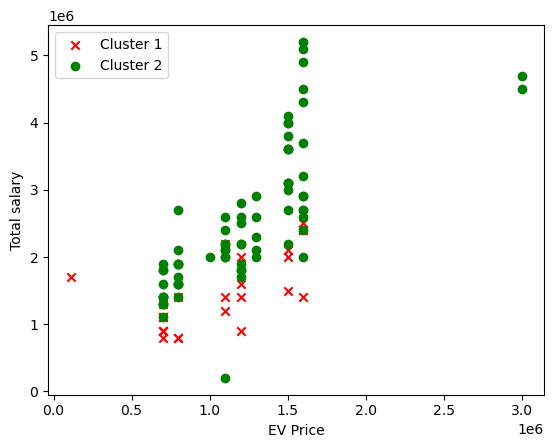

In [39]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

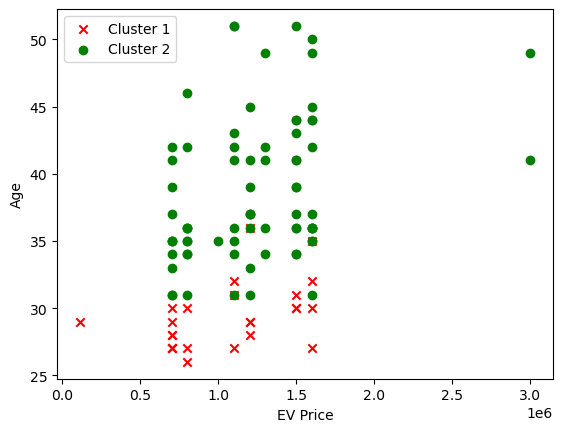

In [40]:

plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

In [41]:
from mpl_toolkits.mplot3d import Axes3D

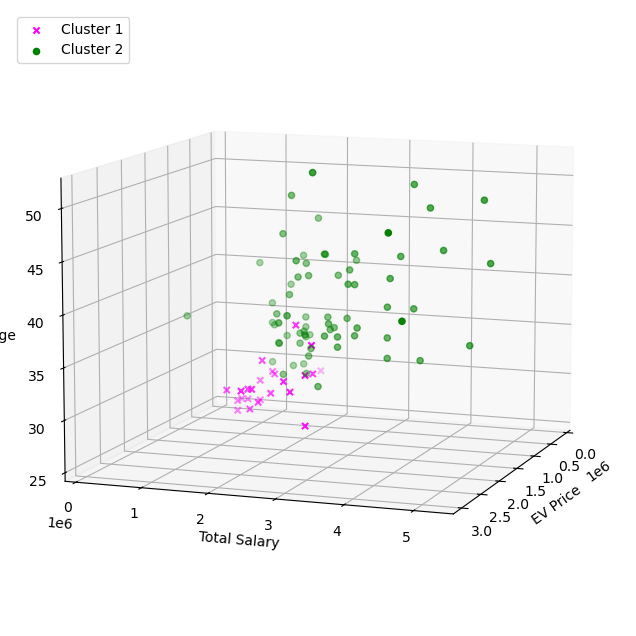

In [45]:

# plotting influence of age 

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='magenta', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()


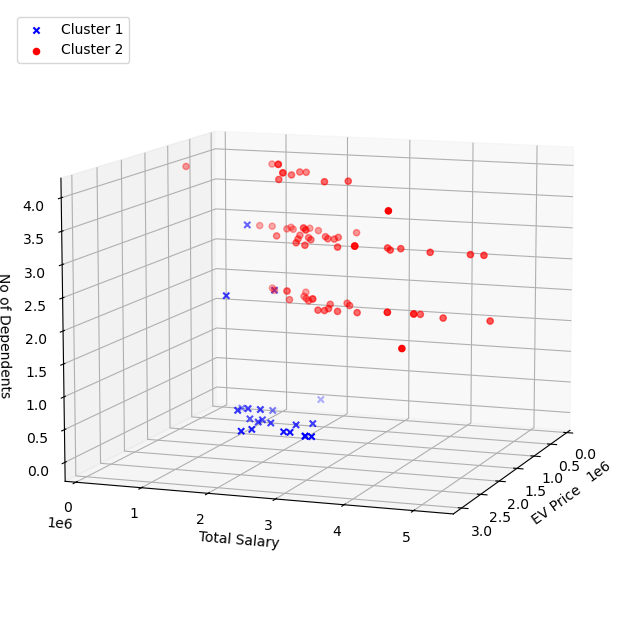

In [46]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='blue', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='red', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()
     

In [47]:
data['No of Dependents'].value_counts()

No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64

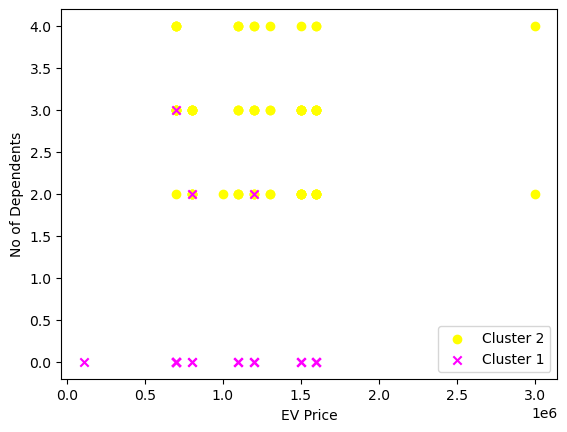

In [48]:
# plotting the effct of no of dependents and ev price on cluster data


plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='yellow', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='magenta', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()
